# Лабораторная работа №7. Работа с текстовыми данными.


### 1)	Изучите материал лекции 12, проделайте пример, описанный в ходе работы. LDA

In [3]:
import numpy as np
from pandas.core import sorting
from sklearn.datasets import load_files

train_revs = load_files("aclImdb_v1/aclImdb/train/")
train_text, y_train = train_revs.data, train_revs.target
train_text = [doc.replace(b'<br />', b' ') for doc in train_text]

test_revs = load_files("aclImdb_v1/aclImdb/test/")
test_text, y_test = test_revs.data, test_revs.target
test_text = [doc.replace(b'<br />', b' ') for doc in train_text]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vector = CountVectorizer(max_features=18888, max_df=0.18)
X = vector.fit_transform(train_text)

lda = LatentDirichletAllocation(n_components=8, learning_method="batch", max_iter=10, random_state=8)
topics_doc = lda.fit_transform(X)
print(lda.components_.shape)

(8, 18888)


In [6]:
feature_names = vector.get_feature_names_out()
# наиболее важные слова для каждой темы, отсортированные по убыванию их значимости
for topic_idx, topic in enumerate(lda.components_):
    sorted_indices = np.argsort(topic)[::-1]  # порядок для убывания
    print(f"Topic №{topic_idx + 1}:")
    for idx in sorted_indices[:10]:  # первые 10 признаков
        print(f"{feature_names[idx]} ({topic[idx]:.4f})")
    print()

Topic №1:
years (4643.0211)
family (4390.1739)
love (4277.8557)
world (3738.3049)
children (3224.9528)
us (3141.6623)
saw (3101.5558)
old (3072.1845)
our (3060.5777)
young (2889.8644)

Topic №2:
funny (6252.3047)
didn (5591.9012)
why (5223.4653)
say (4679.9387)
thing (4455.4869)
your (4310.4109)
should (4172.3516)
guy (4110.8183)
10 (4052.3604)
watching (3879.4634)

Topic №3:
show (6526.3800)
action (5997.3273)
series (5223.8335)
episode (3354.2139)
fight (1977.2980)
episodes (1812.6825)
new (1806.5308)
season (1779.8378)
star (1738.1847)
scenes (1622.0544)

Topic №4:
horror (5636.4994)
scene (4858.9035)
back (4070.0665)
around (3710.0954)
your (3684.4627)
dead (3567.6200)
go (3559.3638)
man (3551.5605)
guy (3520.0777)
re (3487.6295)

Topic №5:
ve (5722.9437)
horror (5348.1138)
say (5143.3242)
actors (4913.9176)
watching (4819.6222)
something (4750.6945)
original (4696.6924)
nothing (4484.7705)
your (4377.3413)
should (4277.2355)

Topic №6:
world (3490.4404)
such (3383.6711)
war (3312.

In [7]:
import mglearn

sorting = np.argsort(lda.components_, axis=1)[:,::-1]
# вывод 8 тем
mglearn.tools.print_topics(topics=range(8), feature_names=feature_names, sorting=sorting, topics_per_chunk=3, n_words=10)

topic 0       topic 1       topic 2       
--------      --------      --------      
years         funny         show          
family        didn          action        
love          why           series        
world         say           episode       
children      thing         fight         
us            your          episodes      
saw           should        new           
old           guy           season        
our           10            star          
young         watching      scenes        


topic 3       topic 4       topic 5       
--------      --------      --------      
horror        ve            world         
scene         horror        such          
back          say           war           
around        actors        us            
your          watching      director      
dead          something     love          
go            original      man           
man           nothing       these         
guy           your          between       
re       

In [8]:
import numpy as np
lda57 = LatentDirichletAllocation(n_components=57, learning_method="batch", max_iter=10, random_state=0)
topics57_doc = lda57.fit_transform(X)
tops = np.array([1,45,12,33,6,19,17,54,57,28])
sorting = np.argsort(lda57.components_, axis=1)[:, ::-1]
feature_names = np.array(vector.get_feature_names_out())
mglearn.tools.print_topics(topics=tops, feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=17)

topic 1       topic 45      topic 12      topic 33      topic 6       
--------      --------      --------      --------      --------      
sean          batman        budget        indian        love          
bruce         adam          monster       didn          woman         
columbo       sandler       zombie        seemed        wife          
chuck         italian       low           thought       husband       
penn          cinderella    pretty        felt          man           
connery       simon         effects       found         mother        
kubrick       giallo        zombies       ending        girl          
lenny         prince        fun           watching      women         
gary          fairy         creature      got           young         
stanley       fellini       horror        indians       married       
harris        jerry         dead          sarah         grant         
orange        tom           gore          enough        relationship  
hoffma

In [9]:
# сортировка док-ов по весу темы 12 (horror, science-fiction)
theme = np.argsort(topics57_doc[:, 12])[::-1]
# 8 док-ов, в к-ых тема horror является наиважнейшей
for i in theme[:8]:
    print(b'.'.join(train_text[i].split(b'.')[:2]) + b'.\n')

b'This is a horror-movie with great atmosphere. The film is pretty bloody consider that it have been made in 1972.\n'
b"Although it's not as creepy as it's cult classic predecessor (ZOMBI 2) I actually like this one better. This is because of it's faster pace, better settings, and cool 80's soundtrack.\n"
b"A very messy (as the video box states) and interesting horror movie. Has some flaws, such as slow-paced action, and the 'video-look', but still, for a movie with practically no budget, it's very strange off-the-wall, yet enjoyable.\n"
b'This movie is about a young scientist who creates a serum that re-animates the dead. He first uses it on his brother when he is shot dead in a drive by.\n'
b"Generally, it's difficult to rate these cut-&-paste films. Some of the segments can be quite good while others bring down the rating of the overall product.\n"
b'A crop dusting machine from the agricultural pest-control is emitting ultra-sonic waves that are re-animating corpses..\n'
b"This movi

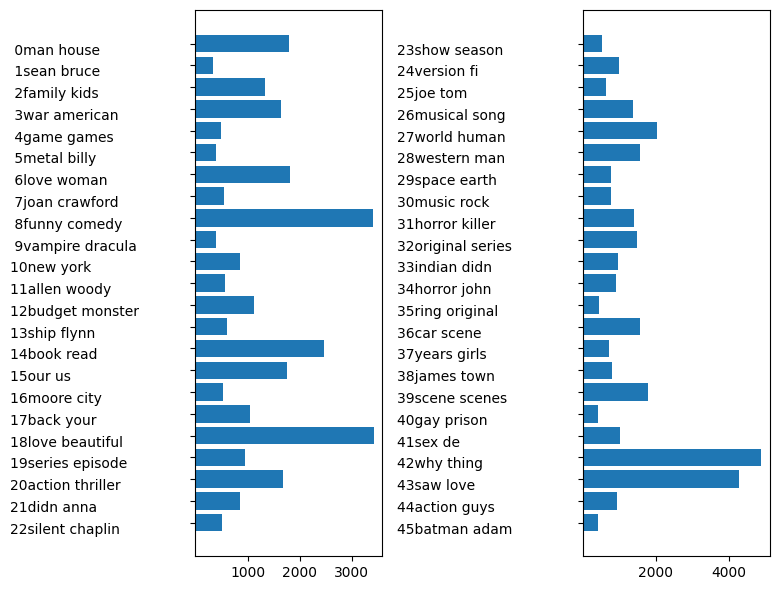

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
topic_names = ["{:>2}".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:,:2]])]
for column in [0,1]:
    start = column * 23
    end = (column + 1) * 23
    ax[column].barh(np.arange(23), np.sum(topics57_doc, axis=0)[start:end])
    ax[column].set_yticks(np.arange(23))
    ax[column].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[column].invert_yaxis()
    ax[column].set_xlim(0.2000)
    yax = ax[column].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()